# Turing Machines

In [2]:
import sys
 

#----TURN THESE ON IF RUNNING ON JOVE ON COLAB by removing the triple quotes

'''
! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
import sys
sys.path.append('./Jove')
sys.path.append('./Jove/jove')
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
 
#---- ALWAYS INCLUDE BEFORE ANY call such as AnimateNFA, AnimateDFA, etc ----
# Unfortunately this has to be within EACH iframe... so can't hard-wire
# into the Animate... functions
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
'''

#----TURN THESE ON IF RUNNING ON OWN INSTALLATION (default turned-on)

sys.path[0:0] = ['../..','../../3rdparty',
                 '../../..','../../../3rdparty',
                 '../../../..','../../../../3rdparty',
                ] # Put these at the head of the search path
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)


#---- COMMON IMPORTS BELOW : Add more/less imports as needed/tolerable ---

# EMPTY imports for TM...

You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)



# DTM: accepts "a#x" where a is a substring of x

In [3]:
help(explore_tm)
help(dotObj_tm)

Help on function explore_tm in module jove.Def_TM:

explore_tm(T, tape, nsteps)
    A handy routine to print the result of run_tm plus making 
    future extensions to explore run-results.

Help on function dotObj_tm in module jove.DotBashers:

dotObj_tm(T, FuseEdges=False, tmName='TO_')
    In : T (TM : consistent)
         tmName (string)
    Out: A dot object. 
    Generate a dot object representing the TM T.



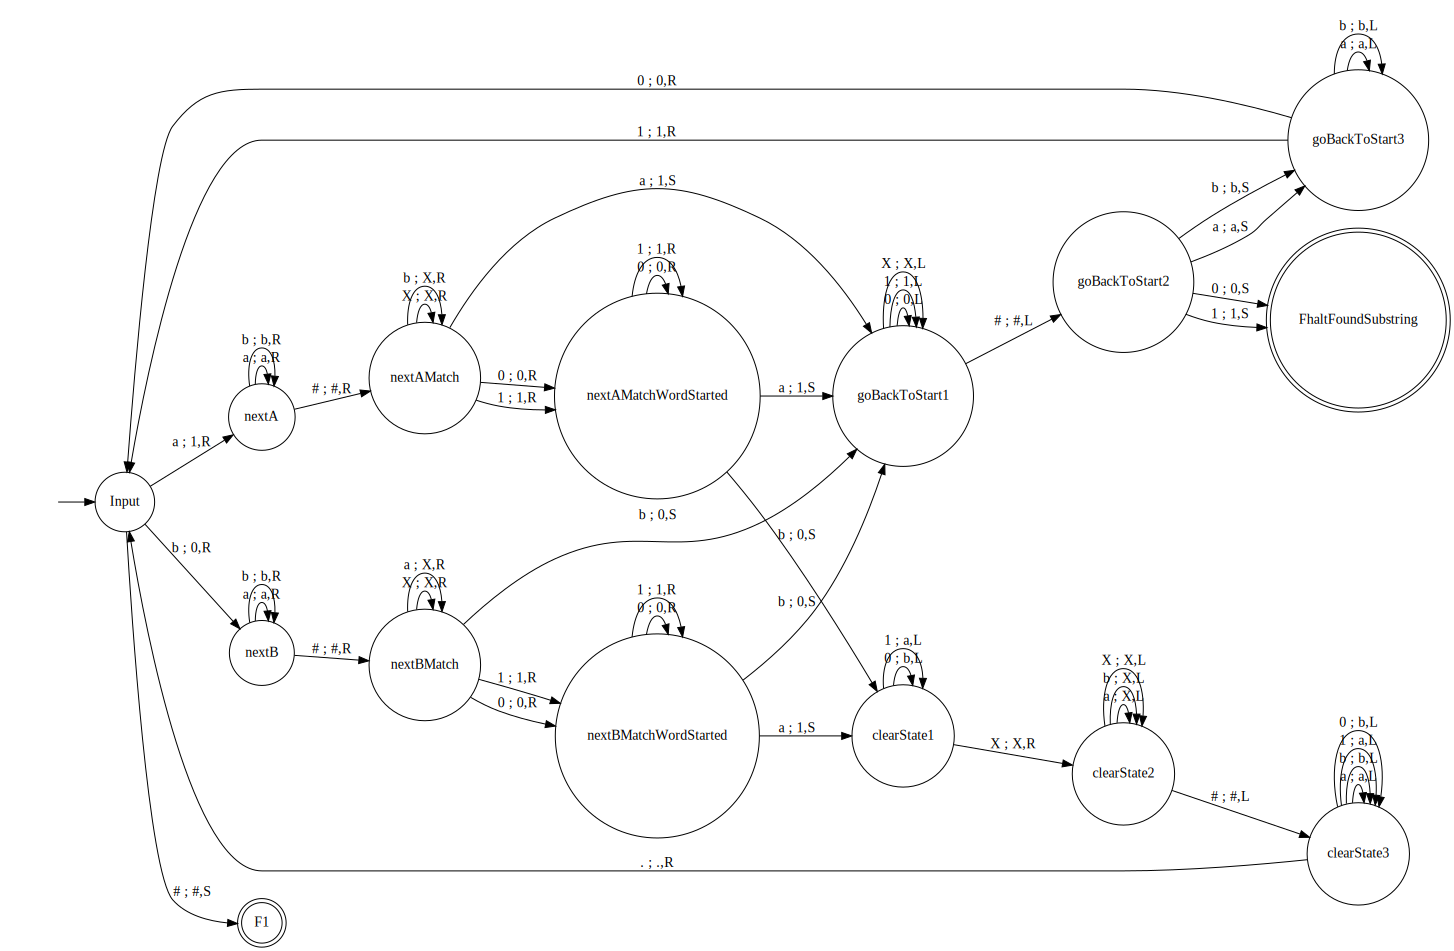

In [43]:
Asg6DTM = md2mc('''TM
!! a = 1
!! b = 0
!! X means no longer looking at
Input: #;#,S -> F1    !! Empty string
Input: a;1,R -> nextA !! We need to look for a next
Input: b;0,R -> nextB !! We need to look for b next

!! First we deal with the case where the next letter we want is to be an A
nextA: a;a,R | b;b,R -> nextA   !! We got to the end of the first string
nextA: #;#,R -> nextAMatch      !! Now we know we are in the next string and go till we can find a match
nextAMatch: X;X,R | b;X,R -> nextAMatch !! We know this is part of the string we have already looked at
nextAMatch: a;1,S -> goBackToStart1
nextAMatch: 0;0,R | 1;1,R -> nextAMatchWordStarted !! We know we are in the middle of the substring
nextAMatchWordStarted: 0;0,R | 1;1,R -> nextAMatchWordStarted !! Cycle till the character we haven't looked at
nextAMatchWordStarted: b;0,S -> clearState1 !! We have found a mismatch! We need to clear our progress
nextAMatchWordStarted: a;1,S -> goBackToStart1 !! We have a letter match and go back to the beginning of the input

!! Now we deal with the case where the next letter we want is B 
nextB: a;a,R | b;b,R -> nextB
nextB: #;#,R -> nextBMatch
nextBMatch: X;X,R | a;X,R -> nextBMatch
nextBMatch: b;0,S -> goBackToStart1
nextBMatch: 0;0,R | 1;1,R -> nextBMatchWordStarted
nextBMatchWordStarted: 0;0,R | 1;1,R -> nextBMatchWordStarted 
nextBMatchWordStarted: a;1,S -> clearState1 
nextBMatchWordStarted: b;0,S -> goBackToStart1 


!! Failure state - failed to match a word and we know that starting position is wrong
clearState1: 0;b,L | 1;a,L -> clearState1
clearState1: X;X,R -> clearState2
clearState2: a;X,L | b;X,L | X;X,L -> clearState2
clearState2: #;#,L -> clearState3
clearState3: a;a,L | b;b,L | 1;a,L | 0;b,L -> clearState3
clearState3: .;.,R -> Input   !! Go back to input

!! Go back to start
goBackToStart1: 0;0,L | 1;1,L | X;X,L -> goBackToStart1
goBackToStart1: #;#,L -> goBackToStart2
goBackToStart2: 0;0,S | 1;1,S -> FhaltFoundSubstring
goBackToStart2: b;b,S | a;a,S -> goBackToStart3
goBackToStart3: a;a,L | b;b,L -> goBackToStart3
goBackToStart3: 0;0,R | 1;1,R -> Input
''')
dotObj_tm(Asg6DTM)

In [44]:
explore_tm(Asg6DTM, "aa#babaaababb", 110)

Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('FhaltFoundSubstring', 9, '........11#XXX11ababb', 56)
 via .. 
 ->('Input', 0, 'aa#babaaababb', 110)
 ->('nextA', 1, '1a#babaaababb', 109)
 ->('nextA', 2, '1a#babaaababb', 108)
 ->('nextAMatch', 3, '1a#babaaababb', 107)
 ->('nextAMatch', 4, '1a#Xabaaababb', 106)
 ->('goBackToStart1', 4, '1a#X1baaababb', 105)
 ->('goBackToStart1', 3, '1a#X1baaababb', 104)
 ->('goBackToStart1', 2, '1a#X1baaababb', 103)
 ->('goBackToStart2', 1, '1a#X1baaababb', 102)
 ->('goBackToStart3', 1, '1a#X1baaababb', 101)
 ->('goBackToStart3', 0, '1a#X1baaababb', 100)
 ->('Input', 1, '1a#X1baaababb', 99)
 ->('nextA', 2, '11#X1baaababb', 98)
 ->('nextAMatch', 3, '11#X1baaababb', 97)
 ->('nextAMatch', 4, '11#X1baaababb', 96)
 ->('nextAMatchWordStarted', 5, '11#X1baaababb', 95)
 ->('clearState1', 5, '11#X10aaababb', 94)
 ->('clearState1', 4, '11#X1baaababb', 93)
 ->('clearState1', 3, '11#Xabaaababb', 92)
 ->('clearState2', 4, '11#X

In [45]:
explore_tm(Asg6DTM, "aba#aba",110)

Detailing the halted configs now.
Accepted at  ('FhaltFoundSubstring', 2, '101#101', 78)
 via .. 
 ->('Input', 0, 'aba#aba', 110)
 ->('nextA', 1, '1ba#aba', 109)
 ->('nextA', 2, '1ba#aba', 108)
 ->('nextA', 3, '1ba#aba', 107)
 ->('nextAMatch', 4, '1ba#aba', 106)
 ->('goBackToStart1', 4, '1ba#1ba', 105)
 ->('goBackToStart1', 3, '1ba#1ba', 104)
 ->('goBackToStart2', 2, '1ba#1ba', 103)
 ->('goBackToStart3', 2, '1ba#1ba', 102)
 ->('goBackToStart3', 1, '1ba#1ba', 101)
 ->('goBackToStart3', 0, '1ba#1ba', 100)
 ->('Input', 1, '1ba#1ba', 99)
 ->('nextB', 2, '10a#1ba', 98)
 ->('nextB', 3, '10a#1ba', 97)
 ->('nextBMatch', 4, '10a#1ba', 96)
 ->('nextBMatchWordStarted', 5, '10a#1ba', 95)
 ->('goBackToStart1', 5, '10a#10a', 94)
 ->('goBackToStart1', 4, '10a#10a', 93)
 ->('goBackToStart1', 3, '10a#10a', 92)
 ->('goBackToStart2', 2, '10a#10a', 91)
 ->('goBackToStart3', 2, '10a#10a', 90)
 ->('goBackToStart3', 1, '10a#10a', 89)
 ->('Input', 2, '10a#10a', 88)
 ->('nextA', 3, '101#10a', 87)
 ->('nextAMat

In [46]:
explore_tm(Asg6DTM, "aba#ab",110)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('nextAMatchWordStarted', 6, '101#10', 84)
 via .. 
 ->('Input', 0, 'aba#ab', 110)
 ->('nextA', 1, '1ba#ab', 109)
 ->('nextA', 2, '1ba#ab', 108)
 ->('nextA', 3, '1ba#ab', 107)
 ->('nextAMatch', 4, '1ba#ab', 106)
 ->('goBackToStart1', 4, '1ba#1b', 105)
 ->('goBackToStart1', 3, '1ba#1b', 104)
 ->('goBackToStart2', 2, '1ba#1b', 103)
 ->('goBackToStart3', 2, '1ba#1b', 102)
 ->('goBackToStart3', 1, '1ba#1b', 101)
 ->('goBackToStart3', 0, '1ba#1b', 100)
 ->('Input', 1, '1ba#1b', 99)
 ->('nextB', 2, '10a#1b', 98)
 ->('nextB', 3, '10a#1b', 97)
 ->('nextBMatch', 4, '10a#1b', 96)
 ->('nextBMatchWordStarted', 5, '10a#1b', 95)
 ->('goBackToStart1', 5, '10a#10', 94)
 ->('goBackToStart1', 4, '10a#10', 93)
 ->('goBackToStart1', 3, '10a#10', 92)
 ->('goBackToStart2', 2, '10a#10', 91)
 ->('goBackToStart3', 2, '10a#10', 90)
 ->('goBackToStart3', 1, '10a#10', 89)
 ->('Input', 2, '10a#10', 88)
 ->('nextA', 3, '101#10', 

In [47]:
explore_tm(Asg6DTM, "aba#baba",110)

Detailing the halted configs now.
Accepted at  ('FhaltFoundSubstring', 2, '101#X101', 72)
 via .. 
 ->('Input', 0, 'aba#baba', 110)
 ->('nextA', 1, '1ba#baba', 109)
 ->('nextA', 2, '1ba#baba', 108)
 ->('nextA', 3, '1ba#baba', 107)
 ->('nextAMatch', 4, '1ba#baba', 106)
 ->('nextAMatch', 5, '1ba#Xaba', 105)
 ->('goBackToStart1', 5, '1ba#X1ba', 104)
 ->('goBackToStart1', 4, '1ba#X1ba', 103)
 ->('goBackToStart1', 3, '1ba#X1ba', 102)
 ->('goBackToStart2', 2, '1ba#X1ba', 101)
 ->('goBackToStart3', 2, '1ba#X1ba', 100)
 ->('goBackToStart3', 1, '1ba#X1ba', 99)
 ->('goBackToStart3', 0, '1ba#X1ba', 98)
 ->('Input', 1, '1ba#X1ba', 97)
 ->('nextB', 2, '10a#X1ba', 96)
 ->('nextB', 3, '10a#X1ba', 95)
 ->('nextBMatch', 4, '10a#X1ba', 94)
 ->('nextBMatch', 5, '10a#X1ba', 93)
 ->('nextBMatchWordStarted', 6, '10a#X1ba', 92)
 ->('goBackToStart1', 6, '10a#X10a', 91)
 ->('goBackToStart1', 5, '10a#X10a', 90)
 ->('goBackToStart1', 4, '10a#X10a', 89)
 ->('goBackToStart1', 3, '10a#X10a', 88)
 ->('goBackToStart2

In [48]:
explore_tm(Asg6DTM, "aba#babba",110)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('nextBMatchWordStarted', 17, '........10a#XXXX1', 40)
 via .. 
 ->('Input', 0, 'aba#babba', 110)
 ->('nextA', 1, '1ba#babba', 109)
 ->('nextA', 2, '1ba#babba', 108)
 ->('nextA', 3, '1ba#babba', 107)
 ->('nextAMatch', 4, '1ba#babba', 106)
 ->('nextAMatch', 5, '1ba#Xabba', 105)
 ->('goBackToStart1', 5, '1ba#X1bba', 104)
 ->('goBackToStart1', 4, '1ba#X1bba', 103)
 ->('goBackToStart1', 3, '1ba#X1bba', 102)
 ->('goBackToStart2', 2, '1ba#X1bba', 101)
 ->('goBackToStart3', 2, '1ba#X1bba', 100)
 ->('goBackToStart3', 1, '1ba#X1bba', 99)
 ->('goBackToStart3', 0, '1ba#X1bba', 98)
 ->('Input', 1, '1ba#X1bba', 97)
 ->('nextB', 2, '10a#X1bba', 96)
 ->('nextB', 3, '10a#X1bba', 95)
 ->('nextBMatch', 4, '10a#X1bba', 94)
 ->('nextBMatch', 5, '10a#X1bba', 93)
 ->('nextBMatchWordStarted', 6, '10a#X1bba', 92)
 ->('goBackToStart1', 6, '10a#X10ba', 91)
 ->('goBackToStart1', 5, '10a#X

In [49]:
explore_tm(Asg6DTM, "bba#bbabba",110)

Detailing the halted configs now.
Accepted at  ('FhaltFoundSubstring', 2, '001#001bba', 78)
 via .. 
 ->('Input', 0, 'bba#bbabba', 110)
 ->('nextB', 1, '0ba#bbabba', 109)
 ->('nextB', 2, '0ba#bbabba', 108)
 ->('nextB', 3, '0ba#bbabba', 107)
 ->('nextBMatch', 4, '0ba#bbabba', 106)
 ->('goBackToStart1', 4, '0ba#0babba', 105)
 ->('goBackToStart1', 3, '0ba#0babba', 104)
 ->('goBackToStart2', 2, '0ba#0babba', 103)
 ->('goBackToStart3', 2, '0ba#0babba', 102)
 ->('goBackToStart3', 1, '0ba#0babba', 101)
 ->('goBackToStart3', 0, '0ba#0babba', 100)
 ->('Input', 1, '0ba#0babba', 99)
 ->('nextB', 2, '00a#0babba', 98)
 ->('nextB', 3, '00a#0babba', 97)
 ->('nextBMatch', 4, '00a#0babba', 96)
 ->('nextBMatchWordStarted', 5, '00a#0babba', 95)
 ->('goBackToStart1', 5, '00a#00abba', 94)
 ->('goBackToStart1', 4, '00a#00abba', 93)
 ->('goBackToStart1', 3, '00a#00abba', 92)
 ->('goBackToStart2', 2, '00a#00abba', 91)
 ->('goBackToStart3', 2, '00a#00abba', 90)
 ->('goBackToStart3', 1, '00a#00abba', 89)
 ->('I

In [50]:
explore_tm(Asg6DTM, "aba#bbabba",240)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Rejected at  ('nextBMatchWordStarted', 18, '........10a#XXXXX1', 161)
 via .. 
 ->('Input', 0, 'aba#bbabba', 240)
 ->('nextA', 1, '1ba#bbabba', 239)
 ->('nextA', 2, '1ba#bbabba', 238)
 ->('nextA', 3, '1ba#bbabba', 237)
 ->('nextAMatch', 4, '1ba#bbabba', 236)
 ->('nextAMatch', 5, '1ba#Xbabba', 235)
 ->('nextAMatch', 6, '1ba#XXabba', 234)
 ->('goBackToStart1', 6, '1ba#XX1bba', 233)
 ->('goBackToStart1', 5, '1ba#XX1bba', 232)
 ->('goBackToStart1', 4, '1ba#XX1bba', 231)
 ->('goBackToStart1', 3, '1ba#XX1bba', 230)
 ->('goBackToStart2', 2, '1ba#XX1bba', 229)
 ->('goBackToStart3', 2, '1ba#XX1bba', 228)
 ->('goBackToStart3', 1, '1ba#XX1bba', 227)
 ->('goBackToStart3', 0, '1ba#XX1bba', 226)
 ->('Input', 1, '1ba#XX1bba', 225)
 ->('nextB', 2, '10a#XX1bba', 224)
 ->('nextB', 3, '10a#XX1bba', 223)
 ->('nextBMatch', 4, '10a#XX1bba', 222)
 ->('nextBMatch', 5, '10a#XX1bba', 221)
 ->('nextBM

In [ ]:
dotObj_tm(Asg6DTM, FuseEdges=True)

In [ ]:
# *** MAKE SURE TO SET FUEL TO 100 OR SO ***
AnimateTM(Asg6DTM, FuseEdges=True)


In [ ]:
Asg6NDTM = md2mc('''TM
!! Your TM here
''')

In [ ]:
explore_tm(Asg6NDTM, "ab#bab", 100)

In [ ]:
# *** MAKE SURE TO SET FUEL TO 100 OR SO ***
AnimateTM(Asg6NDTM, FuseEdges=True)
